# Algoritmo Linear Discriminant Analysis

LDA es una técnica que busca encontrar proyecciones de los datos que maximicen la separación entre distintas clases. Funciona bajo la suposición de que los datos de cada clase siguen una distribución gaussiana con iguales covarianzas, pero distintas medias. Este algoritmo es útil tanto para tareas de clasificación, identificando a qué clase pertenece una nueva muestra (en este caso las reseñas), como para reducción de dimensionalidad.

# 1. Carga de datos

## 1.1 Importación de librerias

In [1]:
# Importación de librerias
import sklearn
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## 1.2 carga de conjuntos de train y test

In [2]:
#Carga de datos de Y_train
Y_train = pd.read_csv('./../../DatosProcesados/Entrenamiento/Y_train_V1.csv', sep=',', encoding = "ISO-8859-1")
Y_train = Y_train['Class']
Y_train.shape

(6254,)

In [3]:
#Carga de datos de Y_test
Y_test = pd.read_csv('./../../DatosProcesados/ValidationTest/Y_validation_V1.csv', sep=',', encoding = "ISO-8859-1")
Y_test = Y_test['Class']
Y_test.shape

(1575,)

In [4]:
#Carga de datos de X_train
X_train = pd.read_csv('X_train_V3.csv', sep=',', encoding = "ISO-8859-1")
X_train.shape

(6254, 10692)

In [5]:
#Cargamos los datos de X_test
X_test = pd.read_csv('./../../DatosProcesados/ValidationTest/X_validation_V1.csv', sep=',', encoding = "ISO-8859-1")
X_test.shape

(1575, 10692)

In [6]:
# Validación de carga
X_train.shape, X_test.shape

((6254, 10692), (1575, 10692))

# 2 Implementación de modelo

In [7]:
# Se crea instancia de LDA
lda = LinearDiscriminantAnalysis()

In [8]:
# Se entrena al modelo
lda.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [9]:
# Se hace predicciones del train
y_pred_train = lda.predict(X_train)

In [10]:
#Analisis cuantitivo
# Se obtiene la exactitud tanto de test como de train
y_pred_test = lda.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.98
Exactitud sobre test: 0.28


In [11]:
# Se imprime matriz de indicadores de test
print(classification_report(Y_test, y_pred_test)) 

              precision    recall  f1-score   support

           1       0.20      0.28      0.24       152
           2       0.17      0.20      0.18       234
           3       0.23      0.30      0.26       315
           4       0.36      0.26      0.30       430
           5       0.40      0.34      0.37       444

    accuracy                           0.28      1575
   macro avg       0.27      0.28      0.27      1575
weighted avg       0.30      0.28      0.29      1575



In [12]:
# Se obtienen las cantidades de valores unicos 
unique_values, counts = np.unique(y_pred_test, return_counts=True)
for value, count in zip(y_pred_test, counts):
    print(f"{value}: {count}")

2: 210
3: 264
4: 415
5: 308
5: 378


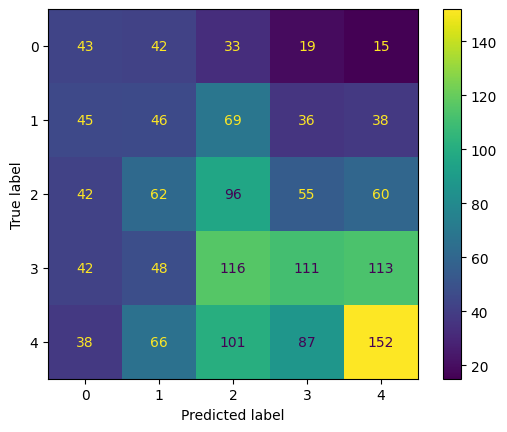

In [13]:
# Se imprime la matriz de confusión 
cm = confusion_matrix(Y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# 3 Resultados y conclusiones

En cuanto a la ejecución del algortimo propuesto, no hubo mayores problemas ya que es una implementación que no requiere de ajustes de hiperparametros por lo que con usar las funciones de fit y predict es suficiente para obtener los resultados.

## 3.1 Análisis cualitativo

Sin embargo, al obtener los indicadores del conjunto de prueba se obtiene un puntaje bastante alto (98%) mientras que para el conjunto de testeo se obtienen valores comparativamente muy bajos (28%). En este orden de ideas se puede concluir lo siguiente

**"El modelo presenta un sobre ajuste de los datos ya que aprendio correctamente a identificar los patrones y/o particularidades del conjunto de entreno pero no es capaz de genralizar la información aprendida con el fin de aplicarla y clasificar los nuevos datos en el conjunto de testeo"**

En cuanto a la matriz de confusión es posible obtener otro tipo de conclusiones como:

1. Clase 1: La clase 1 parece ser la que más confunde al modelo, con la mayoría de sus ejemplos dispersos entre las clases 2 y 3.
   
2. Clase 2: Esta clase también tiene una cantidad significativa de verdaderos positivos (96), pero hay una cantidad considerable de estos ejemplos que fueron clasificados incorrectamente como pertenecientes a la clase 3.

3. Clases 0 y 3: Para la clase 0, hay una distribución relativamente uniforme de errores en las clases 1, 2 y 3, lo que indica cierta confusión del modelo entre estas clases. Similarmente, la clase 3 tiene un número sustancial de sus ejemplos clasificados incorrectamente como clase 2 y 4.
   
4. Clase 4: Esta clase parece ser la mejor predicha por el modelo, con un alto número de verdaderos positivos (152), indicado por el cuadrado amarillo en la esquina inferior derecha. Esto significa que la clase 4 fue predicha correctamente la mayoría de las veces.

**En este orden de ideas, el modelo de clasificación LDA para nuestros datos demostró un alto desempeño en el conjunto de entrenamiento con un 98% de exactitud, pero un rendimiento significativamente más bajo en el conjunto de prueba con un 28%, indicando un sobreajuste pronunciado. La matriz de confusión reveló que la clase 4 se predice con alta precisión, mientras que la clase 1 frecuentemente se confunde con las clases 2 y 3, sugiriendo que el modelo requiere ajustes para mejorar su capacidad de generalización y su discriminación entre clases similares.**